# Architecture

The Apache Spark framework uses a master-slave architecture that consists of a driver, which runs as a master node, and many executors that run across as worker nodes in the cluster. Apache Spark can be used for batch processing and real-time processing as well.

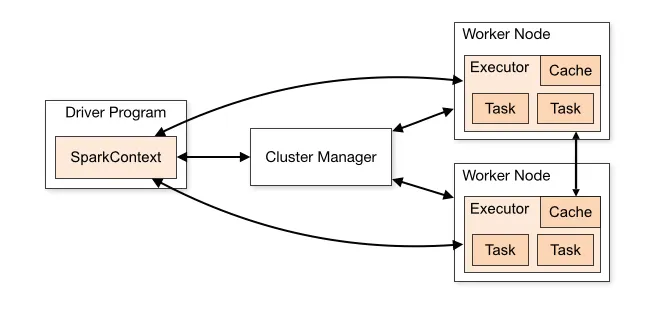


## The Spark driver

The driver is the program or process responsible for coordinating the execution of the Spark application. It runs the main function and creates the SparkContext, which connects to the cluster manager.

**The Driver Program is the entry point of any Spark application.**
It initializes the SparkContext, which is the main point of interaction with Spark.
It converts the high-level Spark operations into jobs, which are further broken down into stages and tasks.

### Components inside the Spark Driver

1. DAG Scheduler: Converts RDD transformations into a Direct Acyclic Graph (DAG) of stages.
2. Task Scheduler: Assigns tasks to different executors.
3. Backend Scheduler: Manages communication with the cluster.
4. Block Manager: Handles storage and caching of RDDs.


In [1]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession

# Creating a Spark configuration
conf = SparkConf().setAppName("SparkArchitectureDemo").setMaster("local[*]")

# Initializing SparkContext
sc = SparkContext(conf=conf)

# Checking the application ID
print("Application ID:", sc.applicationId)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/02/20 18:45:37 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Application ID: local-1740057337556


25/02/20 18:45:37 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


## Worker Nodes & Executors

Executors are worker processes responsible for executing tasks in Spark applications. They are launched on worker nodes and communicate with the driver program and cluster manager. Executors run tasks concurrently and store data in memory or disk for caching and intermediate storage.

- Worker Nodes are machines in the cluster where tasks are executed.
- Each worker node has executors that run the actual computations.
- Executors are long-lived processes that run tasks and store RDD partitions.


In [2]:
print("Number of Cores:", sc.defaultParallelism)

Number of Cores: 20


## The cluster manager

The cluster manager is responsible for allocating resources and managing the cluster on which the Spark application runs. It assigns resources (CPU and memory) to executors. Spark supports various cluster managers like Apache Mesos, Hadoop YARN, and **standalone cluster manager**.

The standalone cluster manager is the default cluster manager.


In [3]:
# Checking which cluster manager is being used
print("Cluster Manager:", sc.master)

Cluster Manager: local[*]


## sparkContext

SparkContext is the entry point for any Spark functionality. It represents the connection to a Spark cluster and can be used to create RDDs (Resilient Distributed Datasets), accumulators, and broadcast variables. SparkContext also coordinates the execution of tasks.


# Task

A task is the smallest unit of work in Spark, representing a unit of computation that can be performed on a single partition of data. The driver program divides the Spark job into tasks and assigns them to the executor nodes for execution.


## Execution Flow of a Spark Job

1. Driver Program initializes the SparkContext.
2. SparkContext connects to the Cluster Manager and requests resources.
3. Cluster Manager assigns resources to Executors.
4. RDD Transformations are converted into DAG by DAG Scheduler.
5. Task Scheduler breaks DAG into individual tasks and assigns them to Executors.
6. Executors execute tasks in parallel.
7. Block Manager handles data storage and caching.
8. Final Results are sent back to the driver.


## Get Cluster Manager In Spark

'local[*]' - means spark app is running in local mode.

## Which Cluster Manager Should You Use?

- Use Standalone (default) for small clusters or testing.
- Use YARN for production workloads in a Hadoop-based environment.
- Use Kubernetes for containerized Spark jobs in cloud environments.
- Use Mesos if running multiple distributed applications alongside Spark.


In [6]:
spark = SparkSession.builder.config(conf=sc.getConf()).getOrCreate()
# sc.conf.get("spark.master")

print("Spark Session Initialized:", spark)
print("Spark Application Name:", spark.sparkContext.appName)
print("Spark Master:", spark.sparkContext.master)

Spark Session Initialized: <pyspark.sql.session.SparkSession object at 0x7f7b6f5d5d30>
Spark Application Name: SparkArchitectureDemo
Spark Master: local[*]


## **Difference Between SparkSession and SparkContext**

Both **SparkSession** and **SparkContext** are essential components of Apache Spark, but they serve different purposes and are used in different contexts. Below is a detailed comparison:

## **1. Overview**

| Feature            | SparkSession                                                     | SparkContext                                                             |
| ------------------ | ---------------------------------------------------------------- | ------------------------------------------------------------------------ |
| **Definition**     | Entry point for Spark applications starting from Spark 2.x       | The initial entry point in Spark 1.x and lower-level API in Spark 2.x+   |
| **Usage**          | Provides access to DataFrame API, SQL, Streaming, and Hive       | Provides access to RDD API and low-level operations                      |
| **Scope**          | Higher-level API that includes SparkContext internally           | Lower-level API for interacting with the cluster                         |
| **Support**        | Supports **DataFrames, Datasets, SQL, Hive, Streaming**          | Supports only **RDDs**                                                   |
| **Ease of Use**    | Easier to use and recommended for modern Spark applications      | More complex, requires manual handling of configurations and connections |
| **Replacement**    | Replaces SQLContext, HiveContext, and SparkContext in Spark 2.x+ | Still exists but is mostly managed internally by SparkSession            |
| **Initialization** | `SparkSession.builder.getOrCreate()`                             | `SparkContext(conf)`                                                     |

## **2. When to Use?**

- **Use SparkSession** if you are working with **DataFrames, Datasets, Spark SQL, Hive, or Structured Streaming**.
- **Use SparkContext** if you need **low-level RDD operations** or need to interact directly with the cluster.


# Setting up spark session for Huge Data i.e. 5TB


In [ ]:
spark = (
    SparkSession.builder.appName("BigDataProcessing")
    .config(
        "spark.driver.memory", "16g"
    )  # Allocates 16 GB of memory to the Spark driver, responsible for task coordination
    .config(
        "spark.executor.memory", "64g"
    )  # Assigns 64 GB of memory per executor for data processing
    .config(
        "spark.executor.cores", "8"
    )  # Each executor will use 8 CPU cores for parallel task execution
    .config(
        "spark.executor.instances", "10"
    )  # Specifies that 10 executors will be launched for distributed processing
    .config(
        "spark.driver.maxResultSize", "4g"
    )  # Prevents driver crashes by limiting the result size collected at once to 4GB
    .config(
        "spark.sql.shuffle.partitions", "1000"
    )  # Controls the number of partitions used during shuffle operations to optimize performance
    .config(
        "spark.default.parallelism", "1000"
    )  # Sets the default number of parallel tasks for RDD-based operations
    .config(
        "spark.network.timeout", "600s"
    )  # Increases network timeout to prevent failures in long-running jobs
    .config(
        "spark.shuffle.service.enabled", "true"
    )  # Enables external shuffle service to improve shuffle reliability
    .config(
        "spark.dynamicAllocation.enabled", "true"
    )  # Allows Spark to dynamically allocate and release executors as needed
    .config(
        "spark.dynamicAllocation.maxExecutors", "50"
    )  # Sets a cap on the maximum number of executors that Spark can allocate dynamically
    .getOrCreate()
)

### **Explanation of Each Configuration in Table Format**

| Configuration | Description |
|--------------|-------------|
| `spark.driver.memory` | Allocates memory for the **driver** node, responsible for job coordination and result collection. |
| `spark.executor.memory` | Specifies the memory allocated per **executor**, which processes data. Higher memory is needed for large datasets. |
| `spark.executor.cores` | Defines the number of CPU **cores per executor**. More cores mean better parallel execution. |
| `spark.executor.instances` | Sets the **number of executors** in the cluster. More executors allow for higher parallelism. |
| `spark.driver.maxResultSize` | Limits the amount of data the **driver** can collect at once to prevent Out of Memory (OOM) crashes. |
| `spark.sql.shuffle.partitions` | Sets the **number of partitions for shuffle operations** (e.g., joins, groupBy). Higher values improve parallelism but may increase overhead. |
| `spark.default.parallelism` | Determines the default number of partitions for **RDD operations**. Should be tuned based on cluster resources. |
| `spark.network.timeout` | Specifies the **network timeout** to prevent failures due to slow processing in large jobs. |
| `spark.shuffle.service.enabled` | Enables an **external shuffle service** to improve shuffle reliability and performance. |
| `spark.dynamicAllocation.enabled` | Allows Spark to **dynamically scale the number of executors** based on workload demand. |
| `spark.dynamicAllocation.maxExecutors` | Limits the **maximum number of executors** Spark can allocate dynamically, preventing excessive resource usage. |


1. Use Parquet Format (optimized for Spark)
2. Use Column Pruning (select only required columns)
3. Partition Data (df.repartition(1000))
4. Cache Intermediate Results (df.persist() when reused)
5. Avoid Wide Transformations (e.g., groupBy and join operations should be optimized)


# Performance Optimization
1. Avoid Data Skew
    - Use salting techniques for skewed keys.
    - Use broadcast joins carefully (disable for large datasets).
2. Optimize Joins
    - Prefer shuffle hash join (df.join(df2, "id", "shuffle_hash")).
    - Use buckets on frequently joined columns.
3 Cache & Checkpoint
    - Cache intermediate results only when necessary:
    df.persist()
    - Use checkpointing for iterative jobs:
    df.checkpoint()


# Spark Cluster Hierarchy

<img src ="http://c1.staticflickr.com/9/8854/28256131573_ec8328799b_o.png">


### Node -> Worker Node:

A node in the context of Spark typically refers to a machine in the cluster. A worker node is a node that runs Spark tasks.

### Worker Node -> Executor:

A worker node can host multiple executors, each running in its own JVM. The number of executors on a worker node is influenced by the cluster manager's configuration.

### Executor -> Cores:

An executor can have multiple cores, and each core can run a task concurrently. The number of cores per executor is a configuration parameter.

### Executor -> Task:

Tasks are executed within an executor. An executor runs multiple tasks concurrently, and `each task processes a partition of the data`.

### Parallelism:

Parallelism is determined by the number of tasks that can be executed concurrently. It is influenced by the number of partitions in RDDs, the number of cores per executor, and the number of executors.


# Configuring Spark Number of Executors and its Cores

Configuring the number of cores and executors in Apache Spark depends on several factors, including

- The characteristics of your workload,
- The available cluster resources, and
- Specific requirements of your application.

While there is no one-size-fits-all approach, here are some general guidelines to help you configure these parameters effectively:

- **Number of executors** : The `number of executors should be equal to the number of cores on each node` in the cluster.
  If there are more cores than nodes, then the number of executors should be equal to the number of nodes.
- **Memory per executor**: The amount of `memory allocated to each executor should be based on the size of the data` that will be processed by that executor. It is important to leave some memory available for the operating system and other processes. A good starting point is to allocate 1GB of memory per executor.
- **Number of partitions**: `The number of partitions used for shuffle operations should be equal to the number of executors`.

Let’s try to understand how to decide on the Spark number of executors and cores to be configured in a cluster. For our better understanding Let’s say you have a Spark cluster with 16 nodes, each having 8 cores and 32 GB of memory and your dataset size is relatively large, around 1 TB, and you’re running complex computations on it.

<img src = "https://sparkbyexamples.com/ezoimgfmt/i0.wp.com/sparkbyexamples.com/wp-content/uploads/2023/05/Executor-vs-Cores.jpg?w=263&ssl=1&ezimgfmt=ng:webp/ngcb1">

Note: For the above cluster configuration we have:

**Available Resources**

- Total cores in the cluster = 16 nodes \* 8 cores per node = 128 cores
- Total memory in the cluster = 16 nodes \* 32 GB per node = 512 GB

**Workload Characteristics**
Large dataset size and complex computations suggest that you need a high level of parallelism to efficiently process the data. Let’s assume that you want to allocate 80% of the available resources to Spark.
Now let’s try to analyze the efficient way to decide Spark’s Number of Executors and Cores.

## Tiny Executor Configuration

One way of configuring Spark Executor and its core is setting minimal configuration for the executors and incrementing it based on the application performance.

### Executor Memory and Cores per Executor (Considering having 1 core per executor)

- Number of executors per node=8,
- Executor-memory=32/8=4GB

### Calculating the Number of Executors (To calculate the number of executors, divide the available memory by the executor memory)

- Total memory available for Spark = 80% of 512 GB = 410 GB
- Number of executors = Total memory available for Spark / Executor memory = 410 GB / 4 GB ≈ 102 executors
- Number of executors per node = Total Number of Executors/ Number of Nodes = 102/16 ≈ 6 Executors/Node

So, in this example, you would configure Spark with 102 executors, each executor having 1 core and 4 GB of memory.

<img src = "https://sparkbyexamples.com/ezoimgfmt/i0.wp.com/sparkbyexamples.com/wp-content/uploads/2023/05/Executor-vs-Cores-1.jpg?w=561&ssl=1&ezimgfmt=ng:webp/ngcb1">

### Pros of Spark Tiny Executor Configuration:

- **Resource Efficiency** Tiny executors consume less memory and fewer CPU cores compared to larger configurations.
- **Increased Task Isolation** With tiny executors, each task runs in a more isolated environment. This isolation can prevent interference between tasks, reducing the chances of resource contention and improving the stability of your Spark application.
- **Task Granularity** Tiny executor configurations can be beneficial if your workload consists of a large number of small tasks. With smaller executors, Spark can allocate resources more precisely, ensuring that each task receives sufficient resources without excessive overprovisioning.

### Cons of Spark Tiny Executor Configuration:

- **Increased Overhead** Using tiny executors can introduce higher overhead due to the increased number of executor processes and task scheduling.
- **Limited Parallelism** Tiny executors have fewer cores, limiting the level of parallelism in your Spark application.
- **Potential Bottlenecks** In a tiny executor configuration, if a single task takes longer to execute than others, it can become a bottleneck for the entire application.
- **Memory Overhead** Although tiny executors consume less memory individually, the overhead of multiple executor processes can add up. This can lead to increased memory usage for managing the executor processes, potentially reducing the available memory for actual data processing.

## Fat Executor Configuration

The other way of configuring Spark Executor and its core is setting the maximum utility configuration i.e. having only one Executor per node and optimizing it based on the application performance.

### Executor Memory and Cores per Executor: Considering having 8 cores per executor,

- Number of executors per node= number of cores for a node/ number of cores for an executor = 8/8 = 1,
- Executor-memory=32/1= 32GB

### Calculating the Number of Executors: To calculate the number of executors, divide the available memory by the executor memory:

- Total memory available for Spark = 80% of 512 GB = 410 GB
- Number of executors = Total memory available for Spark / Executor memory = 410 GB / 32 GB ≈ 12 executors
- Number of executors per node = Total Number of Executors/ Number of Nodes = 12/16 ≈ 1 Executors/Node

So, in this example, you would configure Spark with 16 executors, each executor having 8 core and 32 GB of memory.

<img src = "https://sparkbyexamples.com/ezoimgfmt/i0.wp.com/sparkbyexamples.com/wp-content/uploads/2023/05/Executor-vs-Cores-1.jpg?w=561&ssl=1&ezimgfmt=ng:webp/ngcb1">

### Pros of Fat Executor Configuration

- **Increased Parallelism** Fat executor configurations allocate more CPU cores and memory to each executor, resulting in improved processing speed and throughput.
- **Reduced Overhead** With fewer executor processes to manage, a fat executor configuration can reduce the overhead of task scheduling, inter-node communication, and executor coordination. This can lead to improved overall performance and resource utilization.
- **Enhanced Data Locality** `Larger executor memory sizes can accommodate more data partitions in memory`, reducing the need for data shuffling across the cluster.
- **Improved Performance for Complex Tasks** By allocating more resources to each executor, you can efficiently handle complex computations and large-scale data processing.

### Cons of Fat Executor Configuration

- **Resource Overallocation** Using fat executors can result in overallocation of resources, especially if the cluster does not have sufficient memory or CPU cores.
- **Reduced Task Isolation** With larger executor configurations, tasks have fewer executor processes to run on. This can increase the chances of resource contention and interference between tasks, potentially impacting the stability and performance of your Spark application.
- **Longer Startup Times** Fat executor configurations require more resources and may have longer startup times compared to smaller configurations.
- **Difficulty in Resource Sharing** Fat executors may not be efficient when sharing resources with other applications or services running on the same cluster. It can limit the flexibility of resource allocation and hinder the ability to run multiple applications concurrently.

## Balanced Executor Configuration

Spark founder Databricks after several trail and error testing the spark Executor and cores configuration, they recommends to have 2-5 cores per executor as the best initial efficient configuration for running the application smoothly.

### Executor Memory and Cores per Executor: Considering having 3 cores per executor, Leaving 1 core per node for daemon processes

- Number of executors per node= (number of cores for a node – core for daemon process)/ number of cores for an executor = 7/3 ≈ 2,
- Executor-memory=Total memory per node/ number executors per node = 32/2= 16GB

### Calculating the Number of Executors: To calculate the number of executors, divide the available memory by the executor memory:

- Total memory available for Spark = 80% of 512 GB = 410 GB
- Number of executors = Total memory available for Spark / Executor memory = 410 GB / 16 GB ≈ 32 executors
- Number of executors per node = Total Number of Executors/ Number of Nodes = 32/16 = 2 Executors/Node

<img src = "https://sparkbyexamples.com/ezoimgfmt/i0.wp.com/sparkbyexamples.com/wp-content/uploads/2023/05/Executor-vs-Cores-2.jpg?w=561&ssl=1&ezimgfmt=ng:webp/ngcb1">

So, in this example, you would configure Spark with 32 executors, each executor having 3 core and 16 GB of memory.

In practice, one size does not fit all. You need to keep tuning as per cluster configuration. `But in general, the number of executor cores should be 2-5.`

### Pros of Balanced Executor Configuration:

- **Optimal Resource Utilization** A balanced executor configuration aims to evenly distribute resources across the cluster. This allows for efficient utilization of both CPU cores and memory, maximizing the overall performance of your Spark application.
- **Reasonable Parallelism** By allocating a moderate number of cores and memory to each executor, a balanced configuration strikes a balance between parallelism and resource efficiency. It can provide a good compromise between the high parallelism of small executors and the resource consumption of large executors.
- **Flexibility for Multiple Workloads** A balanced configuration allows for accommodating a variety of workloads. It can handle both small and large datasets, as well as diverse computational requirements, making it suitable for environments where multiple applications or different stages of data processing coexist.
- **Reduced Overhead** Compared to larger executor configurations, a balanced configuration typically involves fewer executor processes. This can reduce the overhead of task scheduling, inter-node communication, and executor coordination, leading to improved performance and lower resource consumption.

### Cons of Balanced Executor Configuration:

- **Limited Scaling** A balanced executor configuration may not scale as effectively as configurations with a higher number of cores or executors. In scenarios where the workload or dataset size significantly increases, a balanced configuration may reach its limit, potentially leading to longer processing times or resource contention.
- **Trade-off in Task Isolation** While a balanced configuration can provide a reasonable level of task isolation, it may not offer the same level of isolation as smaller executor configurations. In cases where tasks have distinct resource requirements or strict isolation requirements, a balanced configuration may not be the most suitable choice.
- **Task Granularity** In situations where the workload consists of a large number of small tasks, a balanced executor configuration may not offer the same level of fine-grained task allocation as smaller executor configurations. This can lead to suboptimal resource allocation and potentially impact performance.
- **Complexity in Resource Management** Maintaining a balanced executor configuration across a dynamic cluster can be challenging. As the cluster size and resource availability change, it may require frequent adjustments to ensure the configuration remains balanced, which can add complexity to cluster management.


## Comparing between the three configurations

| Configuration              | Tiny Executor                                               | Fat Executor                                                           | Balanced Executor                           |
| -------------------------- | ----------------------------------------------------------- | ---------------------------------------------------------------------- | ------------------------------------------- |
| **Executor Memory**        | Low memory allocation (e.g., 1-2 GB)                        | High memory allocation (e.g., 16-32 GB)                                | Moderate memory allocation (e.g., 4-8 GB)   |
| **Number of Cores**        | Few cores (e.g., 1-2)                                       | Many cores (e.g., 8-16)                                                | Moderate number of cores (e.g., 4-8)        |
| **Parallelism**            | Limited parallelism due to fewer cores                      | High parallelism due to many cores                                     | Balanced parallelism                        |
| **Task Granularity**       | Smaller tasks due to fewer resources                        | Larger tasks due to more resources                                     | Moderate task granularity                   |
| **Use Case**               | Suitable for lightweight tasks or constrained resources     | Suitable for memory-intensive tasks and large datasets                 | Balanced use for general workloads          |
| **Resource Utilization**   | Efficient utilization of resources, but limited parallelism | Efficient for parallel processing, but may lead to resource contention | Balanced resource utilization               |
| **Memory-Intensive Tasks** | Limited capacity for memory-intensive tasks                 | Well-suited for memory-intensive tasks                                 | Adequate capacity for moderate memory tasks |
| **CPU-Intensive Tasks**    | Suitable for tasks with low CPU requirements                | Suitable for CPU-intensive tasks                                       | Balanced for a mix of CPU and memory tasks  |


# RDD, DataFrame and Dataset

## RDD (Resilient Distributed Dataset):

**Definition:** RDD stands for Resilient Distributed Dataset. It is the fundamental data structure in Apache Spark, representing an immutable, distributed collection of objects that can be processed in parallel. RDDs are fault-tolerant and can recover lost data due to node failures by using lineage information.

**Characteristics:**

- **Immutability:** RDDs are immutable, meaning their content cannot be changed once created. You can transform an RDD into another RDD through transformations, but the original RDD remains unchanged.
- **Partitioning:** RDDs are divided into partitions, each processed on a separate node in the cluster. Partitioning enables parallelism in distributed computing.
- **Resilience:** RDDs are fault-tolerant. If a partition is lost due to node failure, Spark can recompute it using the lineage information.

## DataFrame:

**Definition:** A DataFrame is a higher-level abstraction built on top of RDD. It represents a distributed collection of data organized into named columns. DataFrames provide a more structured and user-friendly API compared to RDDs, and they support various optimizations.

**Characteristics:**

- **Schema:** DataFrames have a predefined schema, meaning the data is organized into columns with specified data types. This allows Spark to perform optimizations during execution.
- **Lazy Evaluation:** Like RDDs, DataFrames use lazy evaluation, meaning transformations are not executed immediately but are scheduled to be executed later when an action is called.
- **Optimization:** DataFrames leverage the Catalyst optimizer and the Tungsten execution engine, leading to performance improvements.

## Dataset:

**Definition:** A Dataset is a distributed collection of data that provides the benefits of both RDDs and DataFrames. Datasets are strongly typed, allowing for type-safety and improved optimizations, while also providing a functional API similar to RDDs.

**Characteristics:**

- **Strong Typing:** Datasets are strongly typed, meaning that the type of data is known at compile-time. This allows for type safety and optimization of queries.
- **Functional API:** Datasets provide a functional programming API, similar to RDDs, allowing users to express complex data manipulations using transformations and actions.
- **Optimization:** Datasets benefit from the same optimizations as DataFrames, including Catalyst and Tungsten, leading to improved performance.

In summary, RDDs are the basic building blocks of Spark, DataFrames provide a higher-level, structured API for data manipulation, and Datasets combine the benefits of both RDDs and DataFrames, offering strong typing and functional programming capabilities. The choice between them depends on the specific requirements and characteristics of the data processing task at hand.

## Tabular Comparision

| Feature                 | RDD                                           | DataFrame                                         | Dataset                                                 |
| ----------------------- | --------------------------------------------- | ------------------------------------------------- | ------------------------------------------------------- |
| **Definition**          | Resilient Distributed Dataset                 | Distributed collection of data with named columns | Typed distributed collection of data with named columns |
| **Type Safety**         | Not type-safe (untyped)                       | Type-safe (typed)                                 | Type-safe (typed)                                       |
| **Performance**         | Lower performance optimizations               | Optimized for performance                         | Optimized for performance                               |
| **Ease of Use**         | Lower-level API, more manual control          | Higher-level API, easier to use                   | Higher-level API, easier to use                         |
| **Interoperability**    | Supports Java, Scala, Python                  | Supports Java, Scala, Python                      | Supports Java, Scala                                    |
| **Compile-Time Safety** | No compile-time type checking                 | Compile-time type checking (statically typed)     | Compile-time type checking (statically typed)           |
| **Optimization**        | Limited optimizations                         | Optimized Catalyst and Tungsten engine            | Optimized Catalyst and Tungsten engine                  |
| **Schema**              | No predefined schema                          | Predefined schema                                 | Predefined schema                                       |
| **Serialization**       | Java Serialization                            | Tungsten binary format                            | Tungsten binary format                                  |
| **API**                 | Functional transformations                    | Declarative SQL-like operations                   | Functional transformations                              |
| **Immutable**           | Immutable                                     | Immutable                                         | Immutable                                               |
| **Lazy Evaluation**     | Supports lazy evaluation                      | Supports lazy evaluation                          | Supports lazy evaluation                                |
| **Use Cases**           | Low-level data processing, complex algorithms | Data manipulation, exploratory data analysis      | Type-safe, high-level data processing                   |


# **Transformations and Actions in Apache Spark**  

Apache Spark follows a **lazy evaluation** model, meaning it **does not execute operations immediately**. Instead, it builds a **Directed Acyclic Graph (DAG)** of transformations and only executes them when an **action** is triggered.  

Understanding **transformations** and **actions** is crucial for optimizing Spark applications, reducing shuffle operations, and improving performance.  

---

## **1. What are Transformations in Apache Spark?**  
### **Definition:**  
A **transformation** is an operation on an **RDD (Resilient Distributed Dataset), DataFrame, or Dataset** that creates a new dataset from an existing one. Transformations in Spark are **lazy**, meaning they are **not executed immediately**. Instead, Spark **records the operations** and only executes them when an **action** is called.  

### **Types of Transformations**  
Transformations are classified into two types:  
1. **Narrow Transformations**  
2. **Wide Transformations**  

---

### **1.1 Narrow Transformations**  
**Definition:** A **narrow transformation** is a transformation where each partition of the parent RDD contributes to at most **one partition** of the child RDD.  

🔹 **Characteristics:**  
- **No data shuffling** across partitions.  
- Faster and more efficient.  
- Each partition can be processed **independently**.  

🔹 **Examples:**  
| **Transformation** | **Description** |
|-------------------|---------------|
| `map()` | Applies a function to each element and returns a new RDD. |
| `filter()` | Selects elements that satisfy a condition. |
| `flatMap()` | Similar to `map()`, but flattens the result. |

✅ **Example of Narrow Transformation:**  
```python
rdd = spark.sparkContext.parallelize([1, 2, 3, 4, 5])
mapped_rdd = rdd.map(lambda x: x * 2)  # Each partition works independently
filtered_rdd = mapped_rdd.filter(lambda x: x > 5)  # Filtering doesn't require shuffling
```

💡 **Why is it called "narrow"?**  
Because Spark **does not need to move data between partitions** (i.e., no shuffling).

---

### **1.2 Wide Transformations**  
**Definition:** A **wide transformation** is a transformation where **data must be shuffled** across partitions, meaning data from one partition **may contribute to multiple partitions** in the child RDD.  

🔹 **Characteristics:**  
- **Requires data shuffling** across the network.  
- Slower than narrow transformations due to **network IO**.  
- Partitions depend on each other.  

🔹 **Examples:**  
| **Transformation** | **Description** |
|-------------------|---------------|
| `groupByKey()` | Groups values by key, causing shuffle. |
| `reduceByKey()` | Aggregates values by key, more efficient than `groupByKey()`. |
| `sortByKey()` | Sorts data across partitions, causing shuffle. |
| `join()` | Joins two datasets, causing shuffle. |

✅ **Example of Wide Transformation:**  
```python
rdd1 = spark.sparkContext.parallelize([(1, 2), (3, 4), (3, 6)])
rdd2 = spark.sparkContext.parallelize([(3, 9)])

# join() causes a shuffle
joined_rdd = rdd1.join(rdd2)
```
💡 **Why is it called "wide"?**  
Because Spark **must move data between partitions**, which requires a **shuffle operation**.

---

## **2. What are Actions in Apache Spark?**  
### **Definition:**  
An **action** triggers the execution of all **lazy transformations** and returns a result to the driver or writes it to storage.  

### **Types of Actions**  
Actions are classified into two types:  
1. **Actions that return results to the driver**  
2. **Actions that save results to external storage**  

---

### **2.1 Actions that Return Results to the Driver**  
🔹 **Examples:**  

| **Action** | **Description** |
|------------|---------------|
| `collect()` | Fetches all elements from all partitions to the driver. |
| `count()` | Returns the number of elements in an RDD. |
| `first()` | Returns the first element of an RDD. |
| `take(n)` | Returns the first `n` elements. |
| `reduce()` | Aggregates elements using a function. |

✅ **Example:**  
```python
rdd = spark.sparkContext.parallelize([1, 2, 3, 4, 5])
result = rdd.reduce(lambda a, b: a + b)  # Sums all elements
print(result)  # Output: 15
```

⚠️ **Caution:** `collect()` should be used with caution because **it brings all data to the driver**, which can cause **OutOfMemory errors** for large datasets.

---

### **2.2 Actions that Save Results to External Storage**  
🔹 **Examples:**  

| **Action** | **Description** |
|------------|---------------|
| `saveAsTextFile(path)` | Saves the RDD to a text file. |
| `saveAsSequenceFile(path)` | Saves the RDD as a Hadoop sequence file. |
| `saveAsObjectFile(path)` | Saves the RDD as a serialized object file. |

✅ **Example:**  
```python
rdd = spark.sparkContext.parallelize(["Spark", "Big Data", "Machine Learning"])
rdd.saveAsTextFile("/tmp/output")  # Saves data to a file
```

---

## **3. Lazy Evaluation in Spark**  
Spark **does not execute transformations immediately**. Instead, it **builds a DAG** and waits for an **action** to be called before executing the pipeline.

✅ **Example Demonstrating Lazy Evaluation:**  
```python
rdd = spark.sparkContext.parallelize([1, 2, 3, 4, 5])
mapped_rdd = rdd.map(lambda x: x * 2)  # Transformation (not executed)
filtered_rdd = mapped_rdd.filter(lambda x: x > 5)  # Transformation (not executed)

print(filtered_rdd.count())  # Action (triggers execution)
```
Here, Spark will **not execute `map()` and `filter()`** until `count()` is called.

---

## **4. Key Differences Between Transformations and Actions**  
| Feature | **Transformations** | **Actions** |
|---------|------------------|-----------|
| **Execution** | **Lazy (not executed immediately)** | **Triggers execution** |
| **Returns** | **New RDD/DataFrame** | **Final result (or stores data)** |
| **Example Operations** | `map()`, `filter()`, `reduceByKey()` | `count()`, `collect()`, `saveAsTextFile()` |

---

## **5. Optimization Tips for Transformations & Actions**
1. **Prefer `reduceByKey()` over `groupByKey()`**  
   - `groupByKey()` causes a shuffle, while `reduceByKey()` **performs aggregation before shuffle**, reducing data transfer.  
2. **Avoid `collect()` on large datasets**  
   - `collect()` brings **all data to the driver**, which can cause **OutOfMemory issues**.  
3. **Use `persist()` or `cache()` when reusing RDDs**  
   - **Example:**
     ```python
     rdd = spark.sparkContext.parallelize([1, 2, 3, 4, 5])
     cached_rdd = rdd.map(lambda x: x * 2).cache()
     print(cached_rdd.count())  # First action triggers execution
     print(cached_rdd.collect())  # Data is now cached, avoiding recomputation
     ```

---

## **Interview Questions on Transformations & Actions**
1. **What is the difference between narrow and wide transformations?**  
2. **Why are transformations in Spark lazy?**  
3. **Give examples of narrow and wide transformations.**  
4. **What is the difference between `map()` and `flatMap()`?**  
5. **Why should you avoid `groupByKey()`?**  
6. **What happens when you call `collect()` on a large dataset?**  

---

### **Conclusion**
Understanding **transformations and actions** is key to **writing efficient Spark applications**. By leveraging **lazy evaluation, minimizing shuffles, and using the right transformations**, you can **optimize performance** and **reduce execution time**.

Would you like a **real-world example** demonstrating **performance optimization**? 🚀